# Sentiment analysis by classifying reviews as either positive or negative

In [12]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from collections import defaultdict

In [13]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [14]:
#import all the necessary csv files
parent_dir = 'D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/Kaggle Dataset/'

path_dic = {
            'B':parent_dir+'business_s.csv',
            'R':parent_dir+'Review2021.csv',
            'U':parent_dir+'U.csv',
            'D':parent_dir+'documents.csv'
           }

documents = pd.read_csv(path_dic['D'])

# NLTK

In [15]:
save_documents = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()

In [16]:
print(documents.iloc[0][1])

They can't manage to get online orders right and no one there answers the phone to be able to correct them. They don't even have a voicemail to leave a message.


In [17]:
# We will use the stemmer to stem all the words
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

print([ps.stem(w) for w in example_words])

['python', 'python', 'python', 'python', 'pythonli']


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
 
data = "This is nonsense. I hate this place. The food is bad and the service is terrible"
stopWords = list(set(stopwords.words('english')))
# stopWords[:5]
print(' '.join([w for w in data.split() if w not in stopWords ]))

This nonsense. I hate place. The food bad service terrible


In [20]:
documents.columns
documents.drop(documents.columns[[0]], axis = 1, inplace = True)

In [21]:
records = documents. to_records(index=False)
result = list(records)
#print(result)

In [22]:
all_words = []

for (t, star) in result:
    for word in t.split():
        w = word.lower().replace('.', '').replace(',', '').replace('!', '')
        all_words.append(ps.stem(w))
        
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))
print("stupid appeared: " + str(all_words['stupid']) + " times")

[('the', 611940), ('and', 476996), ('i', 344674), ('to', 328368), ('a', 299903), ('wa', 234370), ('of', 169808), ('for', 152467), ('it', 151977), ('is', 145721), ('in', 141882), ('my', 133234), ('they', 117527), ('thi', 110457), ('with', 107695)]
stupid appeared: 319 times


In [23]:
words_features = [s for (s,_) in list(all_words.most_common(5000))]

save_word_features = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/word_features5k.pickle","wb")
pickle.dump(words_features, save_word_features)
save_word_features.close()

print(words_features[:10])

['the', 'and', 'i', 'to', 'a', 'wa', 'of', 'for', 'it', 'is']


In [24]:
documents = result
def find_features(document):
    words = set(document.split())
    features = {}
    for w in words:
        w = w.lower().replace('.', '').replace(',', '').replace('!', '')
        w = ps.stem(w)
        features[w] = (w in words_features)
    return features

featuresets = [(find_features(doc), star) for (doc,star) in documents]

print(featuresets[0])

({'answer': True, 'have': True, 'abl': True, 'the': True, 'get': True, 'manag': True, 'a': True, 'onlin': True, "can't": True, 'no': True, 'correct': True, 'them': True, 'one': True, 'they': True, 'leav': True, 'order': True, 'and': True, 'messag': True, 'be': True, 'to': True, 'even': True, 'there': True, 'right': True, "don't": True, 'phone': True, 'voicemail': True}, 1.0)


In [25]:
len(featuresets)

134530

In [26]:
# POS to NEG encode
temp = []
pos_count = 0
for i in range(len(featuresets)):
    if featuresets[i][1] >= 4:
        temp.append((featuresets[i][0], 'pos'))
        pos_count = pos_count + 1
    elif featuresets[i][1] <= 2:
        temp.append((featuresets[i][0], 'neg'))
print("pos rate: ", pos_count / len(temp))
print("len of temp: ", len(temp))

pos rate:  0.7314640407556647
len of temp:  125823


# Trying out some clfs

In [27]:
training_set = temp[:100658]
testing_set = temp[100658:]

print(len(training_set))
print(len(testing_set))

100658
25165


In [28]:
np.random.seed(4747)

clf = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Classifier accuracy: ", nltk.classify.accuracy(clf, testing_set) * 100)
clf.show_most_informative_features(15)

Naive Bayes Classifier accuracy:  67.96344128750248
Most Informative Features
                     smh = True              neg : pos    =    212.3 : 1.0
                incompet = True              neg : pos    =    195.6 : 1.0
                  rudest = True              neg : pos    =    194.1 : 1.0
            unprofession = True              neg : pos    =    151.1 : 1.0
                 fraudul = True              neg : pos    =    128.5 : 1.0
                  racist = True              neg : pos    =    124.6 : 1.0
                careless = True              neg : pos    =     95.7 : 1.0
                  violat = True              neg : pos    =     95.7 : 1.0
                   audac = True              neg : pos    =     93.5 : 1.0
                 disgust = True              neg : pos    =     90.8 : 1.0
                    scam = True              neg : pos    =     86.5 : 1.0
                   unwil = False             neg : pos    =     84.7 : 1.0
                 blata

## Combing multiple classifiers

In [29]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

###############
save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=1200000))
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier = SklearnClassifier(LinearSVC(max_iter=1200000))
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("D:/DCU Documents/Semester 2/Data Analytics and Data Mining/Project/pickled_algos/SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

Original Naive Bayes Algo accuracy percent: 67.96344128750248
Most Informative Features
                     smh = True              neg : pos    =    212.3 : 1.0
                incompet = True              neg : pos    =    195.6 : 1.0
                  rudest = True              neg : pos    =    194.1 : 1.0
            unprofession = True              neg : pos    =    151.1 : 1.0
                 fraudul = True              neg : pos    =    128.5 : 1.0
                  racist = True              neg : pos    =    124.6 : 1.0
                careless = True              neg : pos    =     95.7 : 1.0
                  violat = True              neg : pos    =     95.7 : 1.0
                   audac = True              neg : pos    =     93.5 : 1.0
                 disgust = True              neg : pos    =     90.8 : 1.0
                    scam = True              neg : pos    =     86.5 : 1.0
                   unwil = False             neg : pos    =     84.7 : 1.0
            

Now let's combine the clfs！

In [30]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        chosen_class = votes.count(mode(votes))
        return chosen_class / len(votes)
    
voted_classifier = VoteClassifier(MNB_classifier,
                                  LogisticRegression_classifier, 
                                  LinearSVC_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)


voted_classifier accuracy percent: 96.02622690244387


96.05 % is really impressive!!!!!!!

In [31]:
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

# Looking at the misclassified ones...

In [32]:
res = defaultdict(list)

# take the test set
temp_documents = documents[100658:]

for i in range(len(temp_documents)):
    pred, conf = sentiment(temp_documents[i][0])
    res['text'].append(temp_documents[i][0])
    res['confidence'].append(conf)
    res['predicted'].append(pred)
    res['actual'].append(temp_documents[i][1])
res = pd.DataFrame(res)
res.head()

,text,confidence,predicted,actual
0,"I got Castaways via Uber eats, and let me tell...",1.0,pos,5.0
1,"We ordered via Ubereats, from Castaway's Sport...",1.0,pos,5.0
2,This was a cool little spot with great food fo...,1.0,pos,5.0
3,I went here from a recommendation about their ...,1.0,pos,5.0
4,On a cold night a little hot pho always sounds...,1.0,pos,4.0


In [33]:
res['actual_encode'] = np.where((res['actual'] == 4.0) | (res['actual'] == 5.0), 'pos', 'neg')

misclassified = res[res['actual_encode'] != res['predicted']]
misclassified = misclassified[misclassified['actual']!=3]
misclassified.index = range(len(misclassified))
print("number of misclassifications: ", len(misclassified))
print("misclassification rate: ", len(misclassified) / len(temp_documents))
misclassified.head()

number of misclassifications:  1179
misclassification rate:  0.03480751062824752


,text,confidence,predicted,actual,actual_encode
0,The food was not tasty. The only thing that wa...,1.000000,pos,2.0,neg
1,Came here the other day and overheard a quiet ...,0.666667,pos,1.0,neg
2,I know this is a sushi joint.... but you HAVE ...,0.666667,neg,5.0,pos
3,A great store to shop at they allow all custom...,1.000000,neg,5.0,pos
4,I just moved downtown and I heard about this s...,0.666667,neg,5.0,pos


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.83337913 0.16662087]
 [0.02217382 0.97782618]]


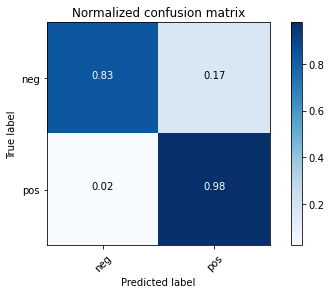

In [35]:
from sklearn import metrics
y_test = res['actual_encode']
y_pred = res['predicted']
class_names = ['neg', 'pos']


# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [36]:
print(misclassified.loc[1, 'text'])
print()
print(find_features(misclassified.loc[1, 'text']))

Came here the other day and overheard a quiet conversation by the White heavy set lady working there saying "if the Jews keep allowing al these n****rs and f****ts into Portland, I'm going to have to lock my doors". Yeah... uhhhh.... not getting my business, sorry but no thanks. I'm just glad I get to write a Yelp review about it so that others can also make an informed decision on whether to support their business.

{'keep': True, 'that': True, 'ladi': True, 'day': True, "i'm": True, 'lock': True, 'here': True, 'have': True, 'say': True, 'go': True, 'get': True, 'inform': True, 'yeah': True, 'work': True, 'whether': True, 'came': True, 'other': True, '"if': False, 'the': True, 'heavi': True, 'review': True, 'an': True, 'a': True, 'allow': True, 'f****t': False, 'my': True, 'no': True, 'their': True, 'set': True, 'these': True, 'busi': True, 'yelp': True, 'can': True, 'doors"': False, 'decis': True, 'it': True, 'jew': False, 'about': True, 'white': True, 'n****r': False, 'and': True, '

In [38]:
len(misclassified)

1179

In [47]:
misclassified.head(20)

,text,predicted,actual,actual_encode
0,The food was not tasty. The only thing that was good there was the Moscow mule. I ate sesame chicken and it gave me a stomachache and I rarely get those.,pos,2.0,neg
1,"Came here the other day and overheard a quiet conversation by the White heavy set lady working there saying ""if the Jews keep allowing al these n****rs and f****ts into Portland, I'm going to have to lock my doors"". Yeah... uhhhh.... not getting my business, sorry but no thanks. I'm just glad I get to write a Yelp review about it so that others can also make an informed decision on whether to support their business.",pos,1.0,neg
2,"I know this is a sushi joint.... but you HAVE to order the fries!! Oh my gosh it's crisp not oily but covered generously in sauce!! Good portion for the price you pay. The only thing that was concerning was that I ordered a spicy tuna roll and I was told it will only take 5 minutes. At first I let the server know that's it's ok And I'll pass on the roll as I was dining with a group who was pretty much done eatting. The server reassured me that my order would be second in line and it won't take long so I ended up ordering it. Unfortunately, the roll came 20 minutes later. It's no ones fault and I understand completely so I'm still going to give them 5 stars. The roll was worth the wait!",neg,5.0,pos
3,A great store to shop at they allow all customers to shop thier and do not discriminate against military veterans in order to shop thier. They accost you for not wearing a mask,neg,5.0,pos
4,I just moved downtown and I heard about this spot for years. I finally got to try and and they nailed my lemon pepper hot wings. I had a failed attempt to get wings at TMac and was disappointed. This is my new wing spot!,neg,5.0,pos
5,"My first time at this location, very busy. You have to wear a mask before you enter, and you sit yourself. They do have a bar area to sit at also. Our waitress was so slow on our order. Our wings came out fast and made correctly. They were very salty. They potatoes dippers are good. \nFrench fries were not made fresh, they sat under a light. Potato dippers were made to order. Asked for lemon in Sprite and never received and waitress didn't come back and check on us. \n\nThey don't clean their tables fast after customers so other customers are standing at the door to sit but no clean tables. Security is at the door. Be careful because the will try to charge you to park on the right hand side of restaurant.",neg,5.0,pos
6,"I'm not even sure if there was a hype to this place but I thought it was like any other drink/dessert/snack place. Even though I was the 2nd person in the shop, I still waited about 10 minutes for 2 drinks. I thought it was pretty slow but my drink turned out ok. I don't think this is staple for me to come back every time but glad there's something at Bridgeport.",neg,4.0,pos
7,"I went in 5 minutes before closing. The guy behind the counter whined like a 5 year needing a nap for 2 minutes telling me I should have come in earlier. After whining about the repair for a minute and then reverting back to whining about coming in earlier, I walked out and drove to Newton to CTS computer who are the best and worth the drive.",pos,1.0,neg
8,"I had used a different junk removal service at the beginning of clearing out all the stuff that was no longer needed. First time they were great the second time it was a bunch of lazy guys . I made it clear that I would not use them again. I had been looking at the removal places that charge by weight and decided to try them. I chose 505 Junk. They were great. They arrived on time , they were polite and friendly (nothing worse than hiring someone you will be paying and they are surly and rude and don't want to complete the task) I think it was always a different team and they were all excellent. The weight factor was always a lot less $ than the other place that guessed how much to charge. 505 Junk weighs it on the truck. A friend is